<div style="border: 6px solid #18453B; padding: 10px; border-radius: 5px; text-align: center;">
   <img src="https://miro.medium.com/v2/resize:fit:2000/1*N1-K-A43_98pYZ27fnupDA.jpeg" alt="Placeholder image" width=900>
    <h1 style="color: #4CAF50;">Homework 06:<br>Linear Regression & Projects</h1>
    <p>Let's learn a bit more about linear regression!</p>
 
</div>


### Instructions for Submitting Names in Notebooks

Please follow the format below when typing your names in the notebook. 

- Each member's name must be written in the format:  
  **Last Name, First Name, Second Name**

#### Example:
    Poe, Edgar Allan

> ⚠️ **Failure to follow this format will result in a reduction of your grade.**

_Emerson, Emilia Maria_

## <font color=#33AA44>Problem #1 (10pts)</font>

![loss](https://miro.medium.com/max/574/1*mOjTP97xJacJLEAQx_L9eA.png)


Derive the basic equations given in class for linear regression (LR) in 1D. Show all of your work. In the next markdown cell and use [$\LaTeX$](https://ashki23.github.io/markdown-latex.html) for the equations.

That is, use the MSE loss function:
$${\cal L}(m,b) = \frac{1}{2}\sum_d \left(y_d - mx_d - b \right)^2,$$
and the minimization condition
$$\frac{\partial {\cal L}}{\partial m} = 0,$$
$$\frac{\partial {\cal L}}{\partial b} = 0.$$
Hopefully you remember how to do partial derivatives! If not, contact us right away! These mathematical steps minimize the loss function and are the statement of _optimization_: see the picture above.

When you do this you should end up with two algebraic equations that involve sums over the data. It might look "messy" - no problem. Show all of your work. What you want to do is solve for $m$ and $b$ (I am using the slope and intercept notation in this problem): if we can write all of the sums in terms of $m$ and $b$, then we have solved the linear regression problem once and for all! We simply plug the data into the sums and out pops the "slope" and "intercept"! 

[Ok, what you are doing here is impressive, but there are some caveats to the "once and for all" statement. We can modify the loss function in many ways and we would need to redo this optimization problem again for each choice.]

Next, once you have solved for $m$ and $b$, write your answer in terms of **statistical quantities** such as the variances, covariances and/or means. Note that you have two equations in two unknowns; you will have to solve those simultaneous equations to get the expressions for $m$ and $b$. 

There are many different notations used for these types of problems. I suggest you establish a convention you like to use and stick with it. Here is what I propose we use for now:

* expectation value (mean)
$$\mathrm{E}[X] \equiv \langle X\rangle \equiv \mu,$$
$$    = \frac{1}{N}\sum_{d=1}^N x_d,$$
where the $d$ sum is over the $N$ data points.

* variance
$$\mathrm{Var}[X] = \mathrm{E}[(X - \mathrm{E}[X])^2],$$
$$    = \mathrm{E}[X^2] - \mathrm{E}[X]^2,$$
$$    = \langle X^2\rangle - \mu^2,$$
$$    = \mathrm{Cov}[X,X].$$

* covariance
$$\mathrm{Cov}[X,Y] = \mathrm{E}[(X - \mathrm{E}[X])(Y - \mathrm{E}[Y])],$$
$$    = \mathrm{E}[XY] - \mathrm{E}[X]\mathrm{E}[Y].$$

I tried to follow definitions used in Wikipedia so that we can all use the same conventions. Note that I have indicated some options for the mean so that you get used to seeing different forms.

I wanted to comment on these conventions. There are two choices here that are not universal: the factor of $\frac{1}{2}$ in ${\cal L}$ and the factor of $\frac{1}{N}$ in the statistical quantities. Neither of these choices really matters as long as you:
* are consistent everywhere in your math,
* use other people's libraries correctly (e.g., `statsmodels`),
* communicate to others what you did.

These choices are commonly made because they make the math cleaner, as you might have noticed already.

Organize your equations so that you completely understand them. You will code them in the next problem. Now that you have these equations you can do linear regression trivially on any dataset - congrats!

Here is what you should get from this problem:
* we start with ${\cal L}$, which in machine learning is referred to as a loss function; there are many, many types of loss functions,
* in each case, by writing the problem in terms of a loss function, we have converted our goal directly into the mathematical problem of optimization,
* in this problem, you go the next step to rewrite the equations you derive in terms of statistical quantities: this shows how linear regression is connected to statistics,
* you should clearly see that we can find patterns in data using the fields of optimization and statistics; next week we will super-power this with linear algebra.

✏️ **Answer** Put your answer in this cell. $\LaTeX$ 

Derivation is in pdf file attached to submission! Could not figure out how to add it to this markdown cell!

In [1]:
#This might work but only if the image uploaded is saved
#from matplotlib Image tutorial
#from PIL import Image
#import matplotlib.pyplot as plt
#import numpy as np

#derivation  =  Image.open('DerivationHW6.')
#fig = plt.figure(figsize = (18,18))
#work = plt.imshow(derivation) 

## <font color=#33AA44>Problem #2 (5pts)</font>

![reg](https://miro.medium.com/v2/resize:fit:1400/1*Ug7uflGlIAjFe6lFMACnfA.png)

Create a dataset that is a noisy line; that is, you have $y= mx+b$ and you want to add a controllable amount of noise to that using `randn` in Numpy. From the equations you derived in the first problem, use that data to compute the slope $m'$ and intercept $b'$, where the prime indicates a value inferred from the data. Also, code the equation for $R^2$. 

Confirm with a plot that you are getting a good fit to your data. Vary the noise, make more plots and comment on how well you are able to predict the actual values of $m$ and $b$. I recommend putting the $m$, estimated $m'$, $b$, estimated $b'$ and $R^2$ in the title of the plot with a scatterplot of the data and a solid line with your linear regression prediction. 

Finally, in a markdown cell, discuss how you could use the code you just wrote to handle missing values. Are there other steps you would want to add? For example, if you need to do stochastic regression, could you use the results of this homework? 


Text(0.5, 1.0, 'Noisy Data, Rsquared = 0.959')

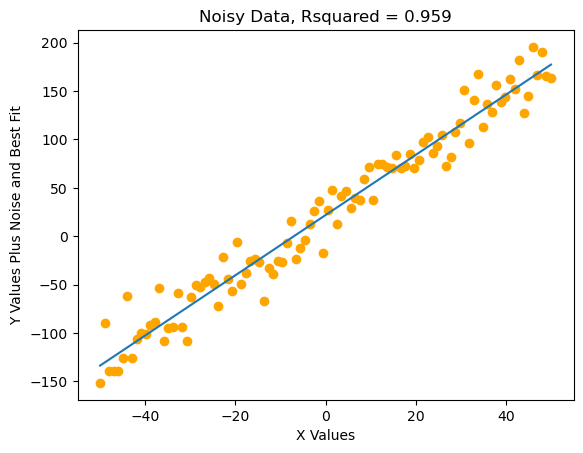

In [2]:
### ANSWER
#importing libraries I might need
import numpy as np                        
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

#generating data with noise for function y = mx + b, based on Week07_InClass_LinearRegression download from CMSE 830
def func(m,b,x): #defines function I want to add noise to 
    return  m*x + b
 
def noisy_data(m, b, x, func, noise_level=20): # function that randomly adds noise, where the level of noise is adjustable
    y = f + np.random.normal(0, noise_level, x.shape)
    return y

x = np.linspace(-50, 50, 100) #generates x values to plug into the function func 
m = 3
b = 20
f = func(m, b, x)
y = noisy_data(m, b, x, f)

#from derived equations, minimizing m' and b' from the noisy data 
m_noise = (sum(x*y)-sum(x)*sum(y))/(sum(x**2) - sum(x)**2)
#b_noise = np.mean(y) - m_noise*np.mean(x)
b_noise = np.mean(y) - m_noise*np.mean(x)

#plots best fit line using derived m and b values along with linspaced x values
best_fit = func(m_noise, b_noise, x)

pearson_corr, p_val = pearsonr(x, best_fit)
#R_sqr = np.square(pearson_corr)
R_sqr = round((1-sum((f-y)**2)/sum((np.mean(y)-y)**2)),3)

plt.scatter(x,y, c = 'orange') #data with random noise
plt.plot(x,best_fit) #best fit line using derived m and b, calling function func
plt.xlabel('X Values')
plt.ylabel('Y Values Plus Noise and Best Fit')
plt.title(f'Noisy Data, Rsquared = {R_sqr}')

#adding r^2 value to the plot
#plt.text(0.25,0.95, R_sqr, fontsize = 12, color = 'red')

Text(0.5, 1.0, 'Noisy Data (less noise), Rsquared = 0.984')

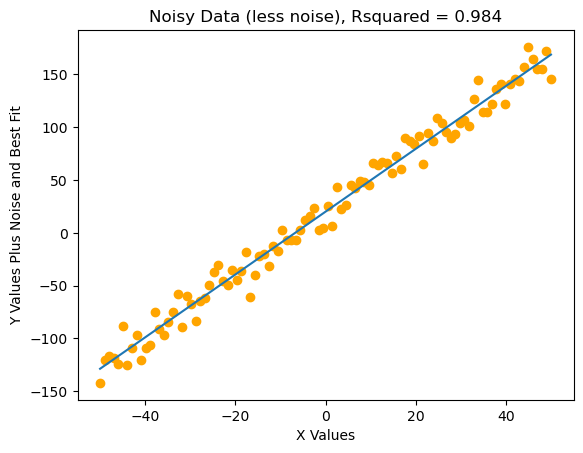

In [3]:
x = np.linspace(-50, 50, 100) #generates x values to plug into the function func 
m = 3
b = 20
f = func(m, b, x)
y = noisy_data(m, b, x, f,10) #adding less noise than the first cell

#from derived equations, minimizing m' and b' from the noisy data 
m_noise = (sum(x*y)-sum(x)*sum(y))/(sum(x**2) - sum(x)**2)

b_noise = np.mean(y) - m_noise*np.mean(x)

#plots best fit line using derived m and b values along with linspaced x values
best_fit = func(m_noise, b_noise, x)

pearson_corr, p_val = pearsonr(x, best_fit)
#R_sqr = np.square(pearson_corr)
R_sqr = round((1-sum((f-y)**2)/sum((np.mean(y)-y)**2)),3)

plt.scatter(x,y, c = 'orange') #data with random noise
plt.plot(x,best_fit) #best fit line using derived m and b, calling function func
plt.xlabel('X Values')
plt.ylabel('Y Values Plus Noise and Best Fit')
plt.title(f'Noisy Data (less noise), Rsquared = {R_sqr}')

Text(0.5, 1.0, 'Noisy Data (more noise), Rsquared = 0.77')

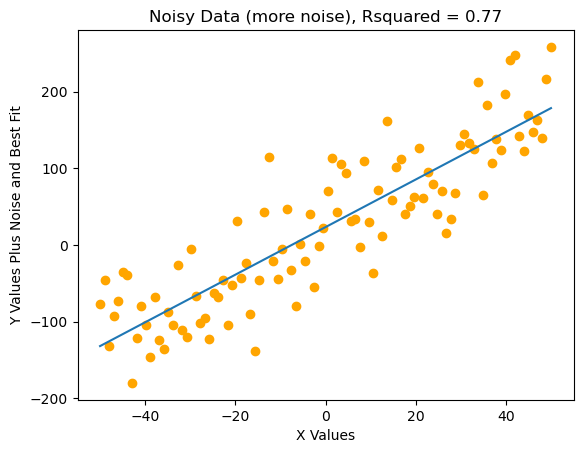

In [4]:
x = np.linspace(-50, 50, 100) #generates x values to plug into the function func 
m = 3
b = 20
f = func(m, b, x)
y = noisy_data(m, b, x, f,45) #adding more noise than the first cell

#from derived equations, minimizing m' and b' from the noisy data 
m_noise = (sum(x*y)-sum(x)*sum(y))/(sum(x**2) - sum(x)**2)

b_noise = np.mean(y) - m_noise*np.mean(x)

#plots best fit line using derived m and b values along with linspaced x values
best_fit = func(m_noise, b_noise, x)

pearson_corr, p_val = pearsonr(x, best_fit)
#R_sqr = np.square(pearson_corr)
R_sqr = round((1-sum((f-y)**2)/sum((np.mean(y)-y)**2)),3)

plt.scatter(x,y, c = 'orange') #data with random noise
plt.plot(x,best_fit) #best fit line using derived m and b, calling function func
plt.xlabel('X Values')
plt.ylabel('Y Values Plus Noise and Best Fit')
plt.title(f'Noisy Data (more noise), Rsquared = {R_sqr}')

✏️ **Answer** As expected, the best fit line is not as good at fitting the data (smaller R-squared) when the noise level is higher. The derived formulas from question one worked! (I also verified they were right based on the lecture slides)

---
## <font color=#33AA44>Problem #3 (5pts)</font>
![smooth](https://miro.medium.com/v2/resize:fit:1400/1*MU-few2K_ZY2gXQdSsFxaw.png)

Explain the differences among regression, smoothing and finding trends, using a markdown cell. 

Connect these three ideas to your project. How will you use, or not use, these three ideas for your project? In general, how do these three approaches fit with our general goal of good storytelling? Can you think of a way to use all three in your project to make the message clearer? 

✏️ **Answer**

**Regression**: finding an equation that predicts y as accurately as possible

**Smoothing**: Removing noise from collected data to come closer to the true values 

**Finding Trends**: finding overarching trends in data. Not so much the nuanced steps, but the overall picture.  

There might be a lot of noise in my data because it is reading spectral absorbance from a wastewater sample. There can be many contaminats all with an infinite amount of structural configurations that could cause interference. I might need to smooth the data in order to get closer to the true value, and then use regression to fit the data to a model. Additionally, there may only be a certain range of wavelenghts that actually change with suspended solids values.

---

## <font color=#33AA44>Problem #4: Project (20pts)</font>

![project](https://i.ytimg.com/vi/pWxDxhWXJos/maxresdefault.jpg)

In this problem you will work on your project.

Keep in mind that for the midterm, you do not need a complete project. You will need that by the end of the semester. The goals for the midterm project are:

* you have a dataset chosen
* you have done IDA and EDA
* you have a good sense that this dataset will do what you want
* you have a Github repo set up where all of your project work lives
* you are becoming an expert on Streamlist and building apps
* you have completed all of the data science tasks we have covered to date on this dataset (if they apply)
    - this could include:
        - encoding
        - scaling
        - imputation
        - transforming
        - and so on.....review the topics from each week of the course to get a list of everything we have covered so far
* importantly, you can communicate:
    - effective visualization, including interactive visualizations
    - storytelling: you know your audience and you know your user (recall the ICA on knowing who you are presenting your data to)

Also, recall that you can change your project after the midterm. I don't recommend this! It will be much more rewarding if you take your current work to a very complete deliverable by working on it for the entire semester. But, there are cases where this just doesn't work out (and it is totally ok!):
* the data didn't do what you hoped it would: it is very common for us to be overly ambitious with our goals relative to what is in datasets we didn't make ourselves 
* you realize that your original idea is not that interesting after all
* you want to stretch yourself and do a "second" project on something completely different: you might fall in love with _spatiotemporal_ data or _textual_ data in the next few weeks!

So, what should you do for this HW problem? Here is what we will do the week before Fall Break (next week!). We will have two ICAs: no lecture. On Tuesday, you will present your project informally to your group. You will have a set of questions to ask each other and you will turn that in as your ICA. You will also teach each other "tricks": 
* how does each person plan to tell their story (this might not be complete until the end of the semester)
* what visualization ideas did you learn from your group that you want to incorporate into your project?
* what Streamlit tricks did your group share? 

You get the idea: that's Tuesday's ICA. Thursday, you will formally present where you are with your project to a different, random group. More instructions will be given next week, but the basic idea is that you use the wall monitors to present to your group while they ask you questions and you have a discussion. 


**Deployment:** Follow this [link](https://docs.streamlit.io/deploy) to learn how to deploy your web app. Remember we (TA and I) will need the link to view your web app.

**From email: In the HW Jupyter notebook under Problem 4 create a new markdown cell and explain the following:**
**Who your audience is:** My audience is scientists working in wastewater research that want to assess the amount of total solids in a wastewater sample given the near infrared (NIR) readings as a way to test this parameter of water quality. 


**What story you want to tell with your data:** The story I would like to tell, if it exists, is that a correlation is possible between the NIR footprint of a sample and its total solid quantity, as well as its turbidity. In this way, a quick scan of the sample could give an idea of the water quality, rather than wait 24hr+ for a total solids (TS) assay result. 


**What kinds of visualizations and interactivity you’re planning:** First, I am planning to visualize the absorbance footprint of the different samples. In this way, I can visualize what range of wavelengths change the most with TS. Depending on these wavelenghts, I will run a correlation to try and determine if there is a positive or negative correlation with these wavelenghts. 

**App URL** https://midsemesterproject-cmse830ee.streamlit.app/ is not working so I will ask in class, however, a screenshot of the local app is submitted with this homework along with the code I have thus far, first visualizations. 


**GitHub Repo** https://github.com/MiaFiori575/MidSemesterProject



---
## <font color=#33AA44>Problem #5 (10pts)</font>
![overfit](https://allmodelsarewrong.github.io/allmodelsarewrong_files/figure-html/plotoverfit6-1.png)

In this problem you are going to explore fitting to different models. In doing so, you will learn about feature engineering, using the `PolynomialFeatures` library I mentioned in the lecture. You will also explore the bias-variance tradeoff. 

That's a lot! 

To simply do this, I'll give you the base code. First, run, understand and _heavily_ comment this code. This will teach you how all of these ideas come together. Then, write in a new markdown cell a detailed summary of what the code does and what trends you saw. Vary the parameters that can be and comment on what is in the plots. Add new plots or print out quantities yourself if that helps. 

For example, a very important take-away is this: the error in the training loss monotonically decreases as the order of the polynomial increases. Why is that? But, the test error has a much more complicated dependence. Why is that? What do both of these tell you about the importance of the idea of breaking the data into two pieces: training and testing? 

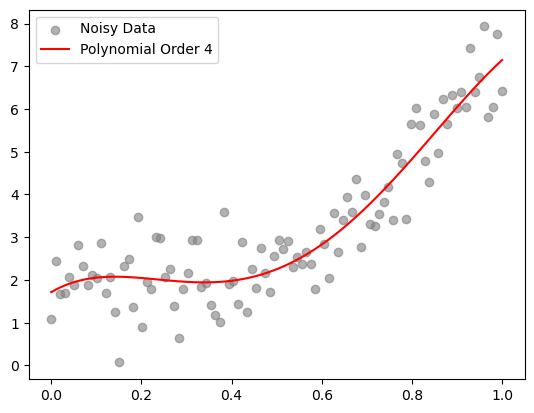

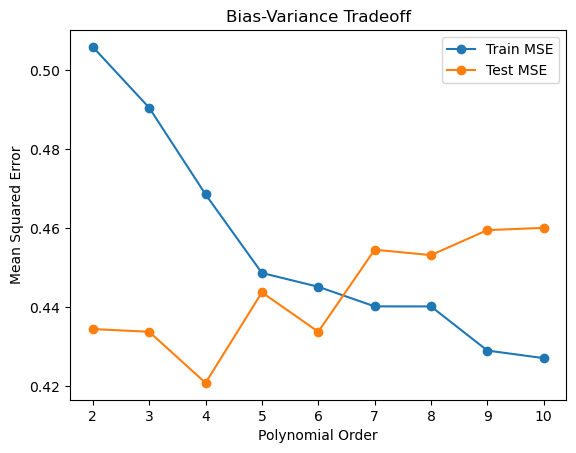

In [5]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Step 1: Create a polynomial of a given order
def create_polynomial_data(order, n_samples=100):#user feeds the order of the polynomial, the number of data points is 100 unless user changes it
    np.random.seed(0)#by setting the seed the random numbers generated will not change with each run of the cell, they will stay the same so you will
    #always be working with the same set of numbers
    X = np.linspace(0, 1, n_samples)#creates a set of 100 (unless changed when calling the function) evenly spaced numbers in the range of 0 to 1 
    y_true = sum([np.random.randn() * (X ** i) for i in range(order + 1)]) #this creates an array of y values with no added noise. The order of x is 
    #fed when calling this function - order +1 in range ensures that the order reaches what was intended by the user-as range is exclusive of the upper
    #bound. random.randn (standard normal distribution- mean 0, std 1) gives a random coefficient for the x 
    #(from power 0 to whatever was fed into the function). Ex. for a second order polynomial
    #this function would produce an equation like: -0.24x^2 + 0.59x + 1 and calculates y based on the linspace x values
    return X, y_true

# Step 2: Add noise to the polynomial
def add_noise(y_true, noise_level=0.1): #takes the data produced from the function 'create_polynomial_data' and adds noise (standard deviation)
    #to the degree the user sets or defaults to 0.1
    noise = np.random.normal(0, noise_level, size=len(y_true)) #produces random interger values with a normal distribution, with the mean of the
    #distribution centering at 0 and a standard deviation of whatever is set as noise_level. The size of the noise array depends on the length of 
    #y_true, basically creating a new array of random values that will be added to the true y values in order to create random noise within the data
    return y_true + noise #returns noisy data

# Step 3: Fit polynomial and plot
def fit_and_plot(X, y, order): #
    poly = PolynomialFeatures(degree=order) #creates an instance of PolynomialFeatures from sklearn.preprocessing
    #This expands x and y into  polynomial terms up to the specified polynomial order
    X_poly = poly.fit_transform(X.reshape(-1, 1))# returns an array of biased intercept 1, the x value, and then the squared x value
    #then this moves on to the next x in the X array and does the same thing
    model = LinearRegression() #this creates a new linear regression model object but does not have any training values
    model.fit(X_poly, y) #this is training the instantiation of the linear regression model above-ie, its learning how to best fit 
    #the input features with target values- it fits the linear regression model to the data, finds coefficients for x
    y_pred = model.predict(X_poly) #generates predictions based on the linear regression model just trained 
    
    # Plot original noisy data and fitted polynomial
    plt.scatter(X, y, label='Noisy Data', color='gray', alpha=0.6) #plots noisy data
    plt.plot(X, y_pred, label=f'Polynomial Order {order}', color='red')#plots trained model y predictions
    plt.legend()
    plt.show()
    return model, poly

# Step 4: Fit on training set and calculate MSE on test set
def train_test_evaluate(X, y, order, test_size=0.5): #sets 50% 0f data for training and 50% for evaluating the model fit 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42) #splits the data based on arrays fed
    
    poly = PolynomialFeatures(degree=order) #creates an instance of PolynomialFeatures from sklearn.preprocessing
    #This expands x and y into  polynomial terms up to the specified polynomial order
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1)) #trains model based on the partition of data created above
    X_test_poly = poly.transform(X_test.reshape(-1, 1))#tests the polynomial optimized fit with the data that was not used for training
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train) #fits the data to the x and y values designated for training
    y_train_pred = model.predict(X_train_poly) #produces y values using the fitted model and training x values
    y_test_pred = model.predict(X_test_poly)#produces y values using the fitted model and test x values (to see how well the trained model can 
    #predict values that were not used to train it
    
    # Calculate MSE on both train and test sets
    mse_train = mean_squared_error(y_train, y_train_pred) #how closely does the model fit data used for training and testing?
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    return mse_train, mse_test

# Step 5: Vary polynomial order and plot MSE (mean squared error) vs order
def bias_variance_tradeoff(X, y, max_order):#Its running the model fitting for every order up to the max 
    #(the +1 is because it starts at 0) and then putting the results in a list to make the orange and blue line graphs
    #this describes the overfitting and underfitting of the machine learning linear regression
    mse_train_list, mse_test_list = [], []
    orders = range(2, max_order + 1)
    
    for order in orders:
        mse_train, mse_test = train_test_evaluate(X, y, order)
        mse_train_list.append(mse_train)
        mse_test_list.append(mse_test)
    
    # Plot MSE vs polynomial order
    plt.plot(orders, mse_train_list, label='Train MSE', marker='o')
    plt.plot(orders, mse_test_list, label='Test MSE', marker='o')
    plt.xlabel('Polynomial Order')
    plt.ylabel('Mean Squared Error')
    plt.title('Bias-Variance Tradeoff')
    plt.legend()
    plt.show()

# Step 6: Putting it all together

# Generate dataset and call all of the functions above
order_true = 4  # True polynomial order
X, y_true = create_polynomial_data(order_true) #creates true y data
y_noisy = add_noise(y_true, noise_level=0.7) #adds noise to data

# Plot the polynomial fit for the true model and noisy data
fit_and_plot(X, y_noisy, order_true) 

# Analyze the bias-variance tradeoff
max_order = 10  # Vary the polynomial degree up to 10
bias_variance_tradeoff(X, y_noisy, max_order)

---
## Congratulations, you're done!

### 🛑 IMPORTANT: Before Submission

**STOP!** Before submitting your notebook, please follow these steps:

### Step 1: Restart Your Kernel

**Jupyter Notebook (Classic):**
- Go to `Kernel` → `Restart & Clear Output`

**JupyterLab:**
- Go to `Kernel` → `Restart Kernel and Clear All Outputs...`

**VS Code:**
- Open Command Palette (`Ctrl+Shift+P` / `Cmd+Shift+P`)
- Type "Jupyter: Restart" and select `Jupyter: Restart`
- Then select `Clear All Output`

**PyCharm:**
- Go to `Run` → `Restart Kernel` (or click the restart button in the toolbar)
- Go to `Cell` → `All Output` → `Clear`

### Step 2: Run All Cells

**Jupyter Notebook (Classic):**
- Go to `Cell` → `Run All`

**JupyterLab:**
- Go to `Run` → `Run All Cells`

**VS Code:**
- Open Command Palette (`Ctrl+Shift+P` / `Cmd+Shift+P`)
- Type "Jupyter: Run All" and select `Jupyter: Run All Cells`

**PyCharm:**
- Go to `Cell` → `Run All` (or use `Ctrl+Shift+F10` / `Cmd+Shift+R`)

### Step 3: Verify Everything Works

Check that all cells execute without errors and produce the expected output

This ensures that your notebook will run correctly when graded and that you haven't missed any dependencies or variable definitions that might exist only in your current session.

*Your submission will be tested in a fresh environment, so this step is crucial for full credit!*


### Step 4: Submit 
Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "Homework" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it!


&#169; Copyright 2025, Department of Computational Mathematics, Science and Engineering at Michigan State University.